# second attempt - reverse prediction with radii

In [1]:
import numpy as np
import pandas as pd
from functions import *
from read_from_file_df import *
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
def calc_neighs(field, i, j,size, radii = 1):
    """ Calculate number of neighbors alive (assuming square field) """
    neighs = 0
    M = generate_twice_tuples(radii)
    for m in M:
        row_idx = m[0] + i
        col_idx = m[1] + j
        if row_idx<0: row_idx+=size
        if col_idx<0: col_idx+=size
        if row_idx>=size: row_idx-=size
        if col_idx>=size: col_idx-=size
        if field[row_idx*size+col_idx]:
            neighs += 1
    return neighs

In [3]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [4]:
SIZE = 5
AMOUNT_BOARDS = 10000
AMOUNT_MOVES = 100
NUM_DICT = 1

In [5]:
gen = 3
size = SIZE
name_df = f'{PATH_DF}\\{SIZE}-{AMOUNT_BOARDS}\\{SIZE}size_{AMOUNT_BOARDS}boards_{gen}gen_reverse'
reverse_df = pd.read_pickle(f'{name_df}.pkl')

In [6]:
new_columns = [f'Col_{i}' for i in range(gen*SIZE*SIZE)]
reverse_df_sort = reverse_df.sort_values(by = new_columns).reset_index(drop=True)
for i in reverse_df_sort.columns:
    reverse_df_sort[i] = reverse_df_sort[i].astype(int)

In [7]:
pixel = 15
radii = 1
loc = find_loc(pixel, size)
print(loc)

(3, 0)


In [8]:
reverse_df['radius1'] = reverse_df.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius2'] = reverse_df.apply(lambda row: calc_neighs(row[size*size:size*size*2],loc[0], loc[1],size,radii ), axis=1)
reverse_df['radius3'] = reverse_df.apply(lambda row: calc_neighs(row[size*size*2:],loc[0], loc[1],size,radii ), axis=1)

C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


In [9]:
reverse_df

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_68,Col_69,Col_70,Col_71,Col_72,Col_73,Col_74,radius1,radius2,radius3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28491,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,3,0,2
28492,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,3,0,4
28493,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,6,6,5
28494,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,6,6,0


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\3009459553.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


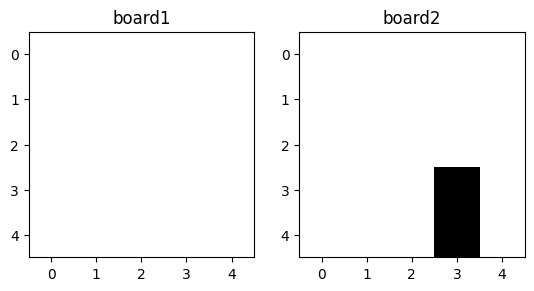

In [10]:
num_board = 200

board1 = reverse_df.iloc[[num_board],0:size*size]
board2 = reverse_df.iloc[[num_board],size*size:size*size*2]

board1_to_show = to_show(board1,size)
board2_to_show = to_show(board2,size)
fig, axes = plt.subplots(1, 2)

axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

plt.show()

In [11]:
reverse_df

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_68,Col_69,Col_70,Col_71,Col_72,Col_73,Col_74,radius1,radius2,radius3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28491,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,1,0,1,3,0,2
28492,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,3,0,4
28493,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,6,6,5
28494,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,6,6,0


In [12]:
# Step 1: Prepare Data
amount_features = (gen-1)*size*size #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]

name_col = 'Col_' + str(amount_features + 1)  # Target: the first pixel in the board
target = reverse_df_sort[name_col]

#TODO: add general code for any amount of gen
features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=365)

print("len x train: ", len(X_train))
print("len x test: ",len(X_test))
print("len y train: ",len(y_train))
print("len y test: ",len(y_test))

dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                measure_error(y_test, y_test_pred, 'test')],
                                axis=1)

print(dt.tree_.node_count, dt.tree_.max_depth)
train_test_full_error

C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


len x train:  25646
len x test:  2850
len y train:  25646
len y test:  2850
13177 46


,train,test
accuracy,0.975474,0.609123
precision,0.991665,0.443386
recall,0.937099,0.416087
f1,0.963610,0.429303


In [13]:
depth_to_check = [4,5,6,7,8,9,10,15,20,30,50,100]

for i in depth_to_check:
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, i, 42)
    
    name_file = f"{PATH_MODELS}\\reverse_model2\\{SIZE}\\decision_tree_size{SIZE}_reverse_df_model2_{str(i)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    
    print(node_count, max_depth)
    print(train_test_full_error)

31 4
              train      test
accuracy   0.678195  0.664912
precision  0.547799  0.535135
recall     0.408799  0.393247
f1         0.468200  0.453349
63 5
              train      test
accuracy   0.683771  0.664912
precision  0.567366  0.541667
recall     0.368178  0.335650
f1         0.446567  0.414470
127 6
              train      test
accuracy   0.688372  0.661053
precision  0.575375  0.530370
recall     0.384382  0.355511
f1         0.460874  0.425684
251 7
              train      test
accuracy   0.696015  0.664211
precision  0.592662  0.537651
recall     0.392596  0.354518
f1         0.472316  0.427289
475 8
              train      test
accuracy   0.707479  0.661053
precision  0.622371  0.531685
recall     0.396309  0.341609
f1         0.484257  0.415961
875 9
              train      test
accuracy   0.720502  0.659298
precision  0.656986  0.528754
recall     0.404749  0.328699
f1         0.500905  0.405389
1549 10
              train      test
accuracy   0.741519  0.65157

In [14]:
amount_features = (gen-1)* SIZE*SIZE #the previous boards
features = reverse_df_sort.iloc[:, :amount_features]
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_col = 'Col_' + str(i+amount_features)
    target = reverse_df_sort[name_col]
    
    #TODO: add general code for any amount of gen
    loc = find_loc(pixel, size)
    features['radius1'] = features.apply(lambda row: calc_neighs(row[:size*size],loc[0], loc[1],size,radii ), axis=1)
    features['radius2'] = features.apply(lambda row: calc_neighs(row[size*size:],loc[0], loc[1],size,radii ), axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=613)
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, 10, 42)
    name_file = f"{PATH_MODELS}\\reverse2\\{SIZE}\\dt_size{SIZE}_r2_pixel_{str(i+1)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    print(i)
    print(node_count, max_depth)
    print(train_test_full_error)

C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:
C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


0
1571 10
              train      test
accuracy   0.740622  0.654737
precision  0.679714  0.528249
recall     0.488066  0.365234
f1         0.568164  0.431871


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


1
1675 10
              train      test
accuracy   0.745379  0.670175
precision  0.711217  0.518741
recall     0.452346  0.358549
f1         0.552985  0.424020


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


2
1667 10
              train      test
accuracy   0.741246  0.663860
precision  0.717172  0.531300
recall     0.433841  0.331996
f1         0.540634  0.408642


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


3
1711 10
              train      test
accuracy   0.748928  0.661404
precision  0.718519  0.517028
recall     0.440959  0.338399
f1         0.546517  0.409063


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


4
1769 10
              train      test
accuracy   0.746042  0.672281
precision  0.702142  0.535817
recall     0.467228  0.380081
f1         0.561089  0.444709


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


5
1689 10
              train      test
accuracy   0.743040  0.666316
precision  0.676519  0.545226
recall     0.507974  0.424242
f1         0.580255  0.477185


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


6
1675 10
              train      test
accuracy   0.742806  0.650877
precision  0.703698  0.504274
recall     0.473366  0.353646
f1         0.565996  0.415737


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


7
1601 10
              train      test
accuracy   0.740349  0.654737
precision  0.700849  0.504814
recall     0.470666  0.370333
f1         0.563144  0.427241


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


8
1645 10
              train      test
accuracy   0.746705  0.664561
precision  0.716644  0.531202
recall     0.458843  0.350050
f1         0.559474  0.422007


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


9
1767 10
              train      test
accuracy   0.745184  0.658596
precision  0.692713  0.515915
recall     0.505882  0.390171
f1         0.584737  0.444318


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


10
1509 10
              train      test
accuracy   0.733214  0.666316
precision  0.679330  0.543909
recall     0.454798  0.379072
f1         0.544838  0.446771


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


11
1731 10
              train      test
accuracy   0.746549  0.670175
precision  0.705292  0.535885
recall     0.459545  0.341117
f1         0.556496  0.416873


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


12
1693 10
              train      test
accuracy   0.745262  0.674737
precision  0.704477  0.562500
recall     0.469547  0.365709
f1         0.563506  0.443243


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


13
1771 10
              train      test
accuracy   0.754192  0.654035
precision  0.713671  0.519501
recall     0.471773  0.329377
f1         0.568042  0.403148


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


14
1745 10
              train      test
accuracy   0.748109  0.664912
precision  0.705245  0.496252
recall     0.463547  0.348421
f1         0.559405  0.409400


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


15
1331 10
              train      test
accuracy   0.727287  0.662456
precision  0.694206  0.563091
recall     0.416493  0.342610
f1         0.520631  0.426014


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


16
1559 10
              train      test
accuracy   0.739531  0.659649
precision  0.683086  0.530846
recall     0.461062  0.365252
f1         0.550532  0.432749


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


17
1671 10
              train      test
accuracy   0.737776  0.660000
precision  0.671889  0.513736
recall     0.491597  0.378160
f1         0.567774  0.435644


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


18
1501 10
              train      test
accuracy   0.734189  0.663509
precision  0.659126  0.512195
recall     0.484549  0.386899
f1         0.558513  0.440816


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


19
1653 10
              train      test
accuracy   0.746081  0.667719
precision  0.701191  0.508221
recall     0.473837  0.354906
f1         0.565519  0.417947


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


20
1515 10
              train      test
accuracy   0.737308  0.667368
precision  0.693152  0.540458
recall     0.460214  0.353646
f1         0.553160  0.427536


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


21
1687 10
              train      test
accuracy   0.745535  0.658947
precision  0.708813  0.529226
recall     0.460645  0.332012
f1         0.558398  0.408039


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


22
1859 10
              train      test
accuracy   0.749591  0.664211
precision  0.709432  0.533333
recall     0.486627  0.359281
f1         0.577278  0.429338


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


23
1733 10
              train      test
accuracy   0.748811  0.655439
precision  0.711172  0.510400
recall     0.443873  0.320603
f1         0.546593  0.393827


C:\Users\dror\AppData\Local\Temp\ipykernel_33432\910354134.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if field[row_idx*size+col_idx]:


24
1677 10
              train      test
accuracy   0.749045  0.651228
precision  0.698856  0.516691
recall     0.492170  0.350049
f1         0.577579  0.417351
